# An Analysis of the Global Film Database: Movie Trends and Viewer Preferences

| GROUP                 | 12 |
| --------------------- | ----------------------- |
| Level                 | 7 (Postgraduate)        |
| Course name           | MSc Business Analytics  |
| Module code           | MN5813                  |
| Module tutor          | Alex Reppel             |
| Assignment number     | 2 (Individual assignment) |
| Assignment title      | An Analysis of the Global Film Database: Movie Trends and Viewer Preferences  |

| Candidate number                  |
| ------------------------------------ |
| 2508069 |

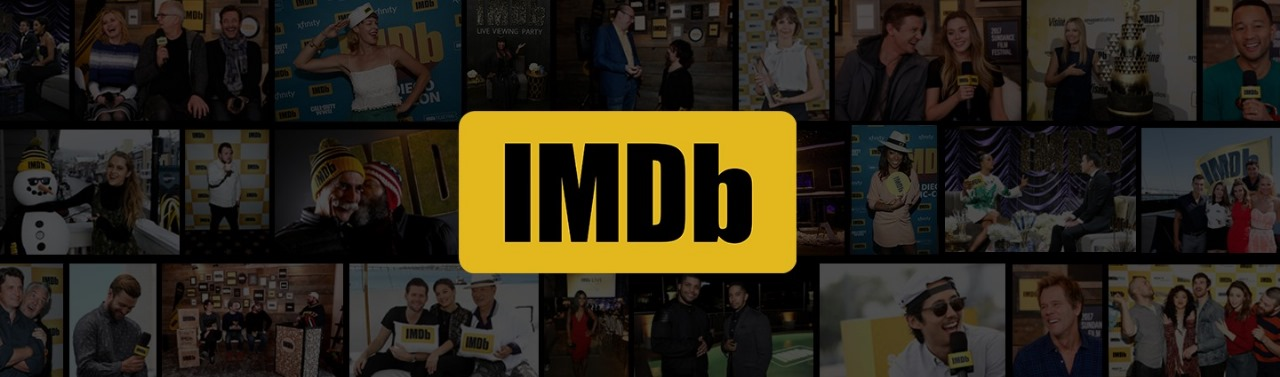

In [4]:
from IPython.display import Image, display, HTML

image_path = "C:/Users/likhi/Downloads/IMDb.jpg"
display(Image(filename=image_path, width=1200))

display(HTML('<p style="text-align:center;"><em>Image Source:</em> <a href="https://community-imdb.sprinklr.com/conversations/imdbcom/imdb-user-ratings-page-redesign/64220f80ac2f711237475865" target="_blank">IMDb Community</a></p>'))



## Project summary

The aim is to examine trends and patterns in the film business by examining a dataset that consists movie names, release years, genres, and ratings. The study's main goals are to comprehend the increase in the number of film releases over time, what popular genres are, and what influenced their higher ratings. The research finds important insights through data cleaning, preprocessing, and exploratory analysis, such as the enduring popularity of horror films and the growth of the thriller and mystery genres. The results demonstrate how powerful tales may increase audience engagement and offer useful information for future studies and industry stakeholders.



## Generative AI

I declare the use of ChatGPT - GPT-40[(OpenAI, 2025)](https://chatgpt.com/) for this report, and that it aligns with acceptable use as specified as part of the assignment brief/guidance and is consistent with good academic practice. The content can still be considered as my own words. I understand that as long as my use falls within the scope of appropriate use as defined in the assessment brief/guidance then this declaration will not have any direct impact on the grades awarded.

The tool was utilised in the following key areas:

- **Programming Support**: ChatGPT provided debugging support to identify and resolve issues in the code, improving the overall functionality and accuracy of the project.
  
- **Content Structuring**: Guidance on organising and structuring written sections of the report. This included advice on how to present arguments clearly, ensure logical flow, and enhance readability while adhering to academic conventions.

- **Concept Clarification**: ChatGPT was used to provide definitions, explanations, and summaries of complex concepts related to the code execution.

- **Data Interpretation**: Assist in interpreting results, offering suggestions on how to present and analyse trends in the data. 

The tool was accessed multiple times between December 2024 and January 2025, with all contributions carefully reviewed and integrated into the report to maintain the integrity of the research.

## Introduction

The motion picture industry has come a very long way in developing the type of content it delivers to the public—content that is both market-suitable and diverse. Analyzing movie production timelines, trends, types of films, and viewer preferences can be highly beneficial for stakeholders such as filmmakers, movie distributors, and analysts conducting market studies.

This project discusses patterns in a general movie dataset, which includes details about the movies' titles, the years they were produced, their categories, and their rankings or popularity. The objectives of this project are outlined below:

### Objectives

1. **Gaining Knowledge of the Independent Variables Affecting Movie Ratings Across Genres:**  
   This objective focuses on analyzing audience ratings and other factors that determine what makes movies successful—whether it’s the genre, a powerful storyline, or innovative concepts.

2. **Identification of Patterns to Understand Audience Preferences:**  
   This involves analyzing how different genres have gained and lost popularity over time, identifying trends that reflect shifts in culture and society.

3. **Examining Trends and Outbound Communication to Analyze Movie Growth Rates:**  
   To achieve this objective, year-over-year movie growth rates and release patterns will be compared. This will help identify different phases of industry growth and periods of increased or diminished activity.

Based on the findings of this study, it is possible to propose guidelines for directors and others involved in moviemaking to develop effective content creation models. These models aim to bridge the gap between public demand and artistic vision. 

Understanding the genres, consumer behaviors, patterns, and cyclical trends of movie production can benefit various players in the movie industry, including filmmakers, distributors, and analysts.


## Setup

### Import necessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import holoviews as hv
import panel as pn

print(f'Pandas Version: {pd.__version__}')
print(f'Holoviews {hv.__version__}')
print(f'Seaborn Version: {sns.__version__}')

Pandas Version: 2.2.2
Holoviews 1.19.0
Seaborn Version: 0.13.2


### Load data

For this analysis, the author employs a public dataset from Kaggle known as “Movies Review” by [(Jaidal Motra, 2021)](https://www.kaggle.com/datasets/jaidalmotra/movies-review/data), a movie dataset from 1915 to 2020. This sums a total of 17 CSV files with each file having the directory 1_movies_per_genre targeting distinct movie genre. They are Action, Adventure, Animation, Biography, Comedy, Crime, Drama, Fantasy, History, Horror, Music, Mystery, Romance, Sci-Fi, Sport, Thriller and War. Every file consists of the database of movies of specific genre, which exactly allows to analyze all the tendencies, preferences of the target audience, as well as characteristics of movies of different categories.

The link to the dataset available on kaggle is [here](https://www.kaggle.com/datasets/jaidalmotra/movies-review/code).


#### Data Import and Preparation

The dataset was read into Python using the Pandas library, which is a powerful tool for handling structured data. All files were read and consolidated into a CSV DataFrame, allowing for easy extraction of data across the 17 movie genres. This approach facilitated efficient data management and analysis, enabling us to compare and analyze trends across different genres.


In [17]:
file_paths = [
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Action.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Adventure.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Animation.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Biography.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Comedy.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Crime.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Drama.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Fantasy.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\History.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Horror.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Music.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Mystery.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Romance.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Sci-Fi.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Sport.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\Thriller.csv",
    r"C:\Users\likhi\Downloads\archive (33)\1_movies_per_genre\War.csv"
]


#### Convert into DataFrame

This code declares an empty list of DataFrames, to which it frequently appends data. It then reads each CSV file from the provided file path and adds the corresponding DataFrame to the list. In case of an exception, it prints an error message whenever there is an issue reading any file.


In [20]:
dataframes = []
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path)
        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")


#### Combining Datasets

Here, all the DataFrames in the list dataframes are combined into a single DataFrame data using the pd.concat() function and a parameter ignore_index=True is used to make the index continuous in the resulting data.


In [22]:
combined_df = pd.concat(dataframes, ignore_index=True)

Display the first few rows and basic information about the DataFrame `df` you have created from `data_source`.

In [24]:
combined_df.head(10)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...
5,Gladiator,2000,R,2h 35min,Action; Adventure; Drama;,5 May 2000 (USA),8.5,1297718,2636,https://www.imdb.com/title/tt0172495/reviews/_...
6,Batman Begins,2005,PG-13,2h 20min,Action; Adventure;,15 June 2005 (USA),8.2,1269027,2885,https://www.imdb.com/title/tt0372784/reviews/_...
7,The Avengers,2012,PG-13,2h 23min,Action; Adventure; Sci-Fi;,4 May 2012 (USA),8.0,1236048,1929,https://www.imdb.com/title/tt0848228/reviews/_...
8,Star Wars: Episode IV - A New Hope,1977,PG,2h 1min,Action; Adventure; Fantasy;,25 May 1977 (USA),8.6,1197132,1834,https://www.imdb.com/title/tt0076759/reviews/_...
9,Star Wars: Episode V - The Empire Strikes Back,1980,PG,2h 4min,Action; Adventure; Fantasy;,20 June 1980 (USA),8.7,1124834,1214,https://www.imdb.com/title/tt0080684/reviews/_...


In [25]:
#Display some basic information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1700 non-null   object 
 1   year          1700 non-null   int64  
 2   movie_rated   1700 non-null   object 
 3   run_length    1700 non-null   object 
 4   genres        1700 non-null   object 
 5   release_date  1700 non-null   object 
 6   rating        1700 non-null   float64
 7   num_raters    1700 non-null   int64  
 8   num_reviews   1700 non-null   int64  
 9   review_url    1700 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 132.9+ KB


## Data management

### Data Source

The dataset in this project consists of approximately a million reviews collected from 1150 IMDb movies in 17 genres: **Action**, **Adventure**, **Animation**, **Biography**, **Comedy**, **Crime**, **Drama**, **Fantasy**, **History**, **Horror**, **Music**, **Mystery**, **Romance**, **Sci-Fi**, **Sport**, **Thriller**, and **War**. 

In addition to the reviews, the dataset includes descriptive information about each movie, including:

- **Year of release**
- **Length**
- **IMDb rating**
- **Number of IMDb voters**
- **Total number of reviews** for the movie

Essentially, this large set of data offers a wide and rich qualitative basis for the study of changes in the worldwide movie industry, including trends in genre preferences and temporal dynamics.


### Data cleaning

In this case, it was observed that a significant number of records had missing data in columns that were considered fundamental.


In [30]:
combined_df.isnull().sum()

name            0
year            0
movie_rated     0
run_length      0
genres          0
release_date    0
rating          0
num_raters      0
num_reviews     0
review_url      0
dtype: int64

In [31]:
#Check duplicated rows
combined_df.duplicated().sum()

308

In [32]:
#Remove duplicated rows
combined_df = combined_df.drop_duplicates()
combined_df.head(10)

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...
5,Gladiator,2000,R,2h 35min,Action; Adventure; Drama;,5 May 2000 (USA),8.5,1297718,2636,https://www.imdb.com/title/tt0172495/reviews/_...
6,Batman Begins,2005,PG-13,2h 20min,Action; Adventure;,15 June 2005 (USA),8.2,1269027,2885,https://www.imdb.com/title/tt0372784/reviews/_...
7,The Avengers,2012,PG-13,2h 23min,Action; Adventure; Sci-Fi;,4 May 2012 (USA),8.0,1236048,1929,https://www.imdb.com/title/tt0848228/reviews/_...
8,Star Wars: Episode IV - A New Hope,1977,PG,2h 1min,Action; Adventure; Fantasy;,25 May 1977 (USA),8.6,1197132,1834,https://www.imdb.com/title/tt0076759/reviews/_...
9,Star Wars: Episode V - The Empire Strikes Back,1980,PG,2h 4min,Action; Adventure; Fantasy;,20 June 1980 (USA),8.7,1124834,1214,https://www.imdb.com/title/tt0080684/reviews/_...


### Check and Convert Data Types

This code checks the data types of all the columns in the combined DataFrame and prints them. Then, using the `head()` function, it displays the first few rows of the dataset to review its structure and content, enabling preliminary analysis or necessary data type adjustments.



In [34]:
# Display the final DataFrame and its data types
print("Data types after conversion:")
print(combined_df.dtypes)

Data types after conversion:
name             object
year              int64
movie_rated      object
run_length       object
genres           object
release_date     object
rating          float64
num_raters        int64
num_reviews       int64
review_url       object
dtype: object


## Data wrangling

### Extracting and Structuring Data

The information in the **release_date** column, originally formatted as *Day Month Year (Country)*, was split to create a separate column for **country**. 


In [37]:
combined_df['release_date'] = combined_df['release_date'].str.strip()

# Clean the 'release_date' column
combined_df['release_date'] = combined_df['release_date'].astype(str).str.strip()

# Extract the country from parentheses and clean the release_date
combined_df['country'] = combined_df['release_date'].str.extract(r'\((.*?)\)', expand=False)
combined_df['release_date'] = combined_df['release_date'].str.extract(r'^(.*?) \(', expand=False)

# Display the result
print(combined_df[['release_date', 'country']].head())
combined_df.head()



       release_date country
0      18 July 2008     USA
1      16 July 2010     USA
2     31 March 1999     USA
3  19 December 2001     USA
4      20 July 2012     USA


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,country
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008,9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,USA
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010,8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,USA
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999,8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,USA
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001,8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,USA
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012,8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,USA


### Categorization of Ratings

The IMDb ratings, ranging from 0 to 10, were categorized into three scales: **Low (0-5)**, **Medium (5-8)**, and **High (8-10)**. By dividing the ratings into these easily comparable categories, it became easier to identify differences between successful and non-successful movies.


In [39]:
#Create a function to categorize the ratings
def categorize_rating(rating):
    if rating >= 0 and rating < 5:
        return 'Low'
    elif rating >= 5 and rating < 8:
        return 'Medium'
    elif rating >= 8 and rating <= 10:
        return 'High'
    else:
        return 'Unknown'  # In case of unexpected rating values

#Apply the function to the 'rating' column to create a new 'rating_category' column
combined_df['rating_category'] = combined_df['rating'].apply(categorize_rating)

# View the updated dataset with the new 'rating_category' column
combined_df[['name', 'rating', 'rating_category']].head()

,name,rating,rating_category
0,The Dark Knight,9.0,High
1,Inception,8.8,High
2,The Matrix,8.7,High
3,The Lord of the Rings: The Fellowship of the Ring,8.8,High
4,The Dark Knight Rises,8.4,High


### Combining Ratings with Categories

To provide better insights into the dataset, a new column called **rating_with_category** was created. This column combines the numerical IMDb ratings with their respective categories—**Low**, **Medium**, and **High**. The formation of this column provides a convenient and easily interpretable view of a movie's rating alongside the category it belongs to, enhancing the clarity of the analysis.


In [41]:
# Create a new column combining 'rating' and 'rating_category'
combined_df['rating_with_category'] = combined_df['rating'].astype(str) + ' (' + combined_df['rating_category'] + ')'

# View the updated dataset with the new 'rating_with_category' column
combined_df[['name', 'rating', 'rating_category', 'rating_with_category']].head()

,name,rating,rating_category,rating_with_category
0,The Dark Knight,9.0,High,9.0 (High)
1,Inception,8.8,High,8.8 (High)
2,The Matrix,8.7,High,8.7 (High)
3,The Lord of the Rings: The Fellowship of the Ring,8.8,High,8.8 (High)
4,The Dark Knight Rises,8.4,High,8.4 (High)


### Creating a Movie Summary Column

A new column, **movie_summary**, was introduced to the dataset by combining key attributes of each movie: **name**, **year**, and **rating**. This addition simplifies the analysis by consolidating crucial information into a single field, enabling easier interpretation and faster decision-making without the need to modify or reformat individual attributes.


In [43]:
# Create the 'movie_summary' column by combining 'name', 'year', and 'rating'
combined_df['movie_summary'] = combined_df['name'] + ' (' + combined_df['year'].astype(str) + ') - Rating: ' + combined_df['rating'].astype(str)

# View the updated dataset with the new 'movie_summary' column
combined_df[['name', 'year', 'rating', 'movie_summary']].head()

,name,year,rating,movie_summary
0,The Dark Knight,2008,9.0,The Dark Knight (2008) - Rating: 9.0
1,Inception,2010,8.8,Inception (2010) - Rating: 8.8
2,The Matrix,1999,8.7,The Matrix (1999) - Rating: 8.7
3,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,The Lord of the Rings: The Fellowship of the R...
4,The Dark Knight Rises,2012,8.4,The Dark Knight Rises (2012) - Rating: 8.4


## Data Analysis and Visualisation

### Data analysis


The data analysis phase of the study aimed to identify patterns, trends, and relationships within the IMDb movie dataset. This included grouping ratings, analyzing the most liked genres, exploring year and region preferences, and identifying exceptional movies based on various characteristics.


### Identifying the Top-Rated Movies

The top 10 movies were selected based on their IMDb ratings, meaning only the movies with the highest ratings are included in the list below. This approach was helpful in determining which movies within the specified genres were considered the best. The results are presented in a table format with the movie names and their corresponding ratings for better clarity and understanding.



In [48]:
top_10_movies = combined_df.sort_values(by='rating', ascending=False).head(10)

# Display the top 10 movies
print("Top 10 Most Rated Movies:")
print(top_10_movies[['name', 'rating']])


Top 10 Most Rated Movies:
                                               name  rating
600                        The Shawshank Redemption     9.3
502                                   The Godfather     9.2
0                                   The Dark Knight     9.0
508                          The Godfather: Part II     9.0
501                                    Pulp Fiction     8.9
102   The Lord of the Rings: The Return of the King     8.9
526                                    12 Angry Men     8.9
1630                                The Mountain II     8.9
300                                Schindler's List     8.9
1300                                      Inception     8.8


### Identifying the Top-Rated Horror Movies

To evaluate the results for horror movies, the dataset was filtered to include only the entries where the 'genre' column contains "horror" (case insensitive). This ensured that all movies falling under the horror genre were considered in the analysis.
Rating 5    |



In [50]:
# Filter for rows where 'horror' is mentioned in the genres column (case-insensitive)
horror_movies = combined_df[combined_df['genres'].str.contains('horror', case=False, na=False)]

top_10_horror_movies = horror_movies.sort_values(by='rating', ascending=False).head(10)

# Display only the top 10 most rated Horror movies
print("Top 10 Most Rated Horror Movies:")
print(top_10_horror_movies[['name', 'rating']])


Top 10 Most Rated Horror Movies:
                   name  rating
1523             Psycho     8.5
903              Psycho     8.5
1317              Alien     8.4
635         The Shining     8.4
901               Alien     8.4
1395          The Thing     8.1
914           The Thing     8.1
964     Rosemary's Baby     8.0
915        The Exorcist     8.0
904   Shaun of the Dead     7.9


### Top 10 Movies Based on Viewer Engagement

The movies with the highest number of ratings in the dataset were identified as the primary focus of this analysis. To do this, the dataset was filtered to include only entries with the 'num_raters' column, which represents the number of ratings a movie has received. The data was then sorted in descending order based on the number of raters, and the top ten movies with the highest viewer engagement were selected and highlighted.

These movies are typically some of the top choices in the dataset in terms of audience appeal. The analysis also incorporates viewer ratings, helping us identify which films attracted the most attention from viewers.

In [52]:
# Remove rows with missing values in 'name' or 'num_raters'
movies_with_raters = combined_df.dropna(subset=['name', 'num_raters'])

# Remove duplicate entries based on the movie name
movies_with_raters = movies_with_raters.drop_duplicates(subset=['name'])

# Sort by 'num_raters' and get the top 10
top10_raters = movies_with_raters.sort_values('num_raters', ascending=False).head(10)

# Display the list of movies with their number of raters
print("Top 10 Movies Based on Number of Raters:")
print(top10_raters[['name', 'num_raters']])

Top 10 Movies Based on Number of Raters:
                                                  name  num_raters
600                           The Shawshank Redemption     2258845
0                                      The Dark Knight     2224522
1                                            Inception     1981675
602                                         Fight Club     1794454
501                                       Pulp Fiction     1767445
604                                       Forrest Gump     1741097
2                                           The Matrix     1619761
3    The Lord of the Rings: The Fellowship of the Ring     1609165
102      The Lord of the Rings: The Return of the King     1593859
502                                      The Godfather     1558661


### Top 10 Movies Based on Number of Reviews

This analysis provides insights into the most discussed and watched movies by focusing on the number of reviews they received. To identify the top 10 movies, the dataset was sorted in descending order based on the 'num_reviews' column. The list below includes the movies that attracted the most attention from audiences and sparked discussions within the film community. 

The number of reviews is a valuable metric to complement ratings, as it reflects the specifics of the movies that impressed or intrigued viewers, leading to greater engagement and conversation.


In [54]:
# Remove rows with missing values in 'name' or 'num_reviews'
movies_with_reviews = combined_df.dropna(subset=['name', 'num_reviews'])

# Remove duplicate entries based on the movie name
movies_with_reviews = movies_with_reviews.drop_duplicates(subset=['name'])

# Sort by 'num_reviews' and get the top 10
top10_reviews = movies_with_reviews.sort_values('num_reviews', ascending=False).head(10)

# Display the list of movies with their number of reviews
print("Top 10 Movies Based on Number of Reviews:")
print(top10_reviews[['name', 'num_reviews']])


Top 10 Movies Based on Number of Reviews:
                                                   name  num_reviews
515                                               Joker        10279
28                                    Avengers: Endgame         8805
600                            The Shawshank Redemption         8022
756       Star Wars: Episode IX - The Rise of Skywalker         7460
1374                                     Captain Marvel         7184
0                                       The Dark Knight         6836
78              Star Wars: Episode VIII - The Last Jedi         6691
3     The Lord of the Rings: The Fellowship of the Ring         5365
438                    Once Upon a Time... in Hollywood         5064
22           Star Wars: Episode VII - The Force Awakens         4794


### Movie with the Highest Rating

The following analysis identifies the movie with the highest IMDb rating in the dataset. This movie represents the pinnacle of cinematic art according to the rankings provided by viewers.

In [56]:
# Sort the DataFrame by 'rating' in descending order and select the top movie
most_rated_movie = combined_df.sort_values(by='rating', ascending=False).iloc[0]

# Display the result
most_rated_movie_details = most_rated_movie[['name', 'rating']]
print("Movie with the Highest Rating")
print(most_rated_movie_details)


Movie with the Highest Rating
name      The Shawshank Redemption
rating                         9.3
Name: 600, dtype: object


### Movie with the Lowest Rating

The movie with the lowest IMDb rating was identified from the dataset. Details such as the movie's title and its rating on IMDb are provided to highlight the movie that received the least positive feedback. This analysis focuses on the lowest score according to the audience, adding valuable insights to the evaluation of movie ratings.


In [58]:
# Sort the DataFrame by 'rating' in ascending order and select the least rated movie
least_rated_movie = combined_df.sort_values(by='rating', ascending=True).iloc[0]

# Display the result
least_rated_movie_details = least_rated_movie[['name', 'rating']]
print("Movie with the Lowest Rating")
print(least_rated_movie_details)


Movie with the Lowest Rating
name      Spice World
rating            3.5
Name: 1092, dtype: object


### Year with the Most Movie Releases

This analysis identifies the year with the most movie releases by sorting the dataset based on the 'year' parameter. The number of movies released in each year was averaged to determine the year with the highest volume of movie productions. This insight highlights the peak year of film production, providing a broader understanding of trends in the movie industry during that period.


In [60]:
# Group by 'year' and count the number of movies released each year
movies_per_year = combined_df.groupby('year')['name'].count()

# Find the year with the maximum releases
most_releases_year = movies_per_year.idxmax()
most_releases_count = movies_per_year.max()

# Display the result
print(f"The year with the most releases is {most_releases_year} with {most_releases_count} movies.")


The year with the most releases is 2007 with 67 movies.


### Average Rating Per Genre

To assess how well each genre performed, additional data preprocessing was done to handle the 'genres' column correctly. Since movies can fall into multiple genres, the 'genres' column was split using a semicolon (`;`) to allow for more specific analysis. After splitting, extra spaces were removed to ensure accurate categorization of genres.

For each genre, the data was filtered by the 'genres' column, and the average IMDb rating was computed. This analysis provides insights into how different genres are perceived by viewers. To address data reliability issues, genre rows with errors or missing values were excluded from the analysis.


In [62]:
# Ensure 'genres' column is properly processed (split and expanded if necessary)
combined_df['genres'] = combined_df['genres'].fillna('').str.strip()

# Expand the 'genres' column into multiple rows if there are multiple genres per movie
movies_genres_expanded = combined_df.assign(
    genres=combined_df['genres'].str.split(';')
).explode('genres').dropna(subset=['genres'])

# Clean up genre names (strip any unwanted spaces)
movies_genres_expanded['genres'] = movies_genres_expanded['genres'].str.strip()

# Group by genre and calculate the average rating
genre_avg_rating = movies_genres_expanded.groupby('genres').agg(
    avg_rating=('rating', 'mean')
).reset_index()

# Remove the first row, if it exists (often this might be an error row)
genre_avg_rating = genre_avg_rating.iloc[1:]

# Display the average rating per genre
print("Average Rating per Genre:")
print(genre_avg_rating)

Average Rating per Genre:
       genres  avg_rating
1      Action    7.246832
2   Adventure    7.354769
3   Animation    7.424752
4   Biography    7.556364
5      Comedy    7.257713
6       Crime    7.605389
7       Drama    7.518040
8     Fantasy    7.156911
9     History    7.408772
10     Horror    7.021138
11      Music    6.989109
12    Mystery    7.469536
13    Romance    7.264286
14     Sci-Fi    7.460870
15      Sport    7.003540
16   Thriller    7.414623
17        War    7.485586
18    Western    8.000000


### Data visualisation


The aim of the data visualizations in this project is to extract valuable insights from the dataset that are not easily obtained by processing raw numeric information alone. Using libraries like Matplotlib, Seaborn, and Holoviews, various features of the movie industry are presented in detail through intuitive and easy-to-understand graphical representations.

Bar charts and line plots are primarily used to present non-moving trends and patterns, such as:

- Yearly movie releases
- Top production countries
- Average ratings across different movie genres

These visualizations offer additional interactivity and engagement. Users can switch between genres, click on elements within a chart for more information, or filter results based on different parameters. This interactivity adds complexity, making the work more engaging and informative.

Beyond simplifying the presentation of data, these visualizations help uncover major trends and correlations, making it easier to understand the underlying patterns and draw actionable insights.


### Number of Movies Released by Year

The primary objective of this analysis is to determine the frequency of movie releases over time. Using the dataset, the number of movies produced each year was calculated and sorted according to the 'year' column. 

The grouped data was then visualized using a line plot to illustrate the variation in movie release trends across the years. Line plots are particularly effective for depicting increases or decreases in yearly movie production, helping us identify periods of higher or lower activity in the movie industry.

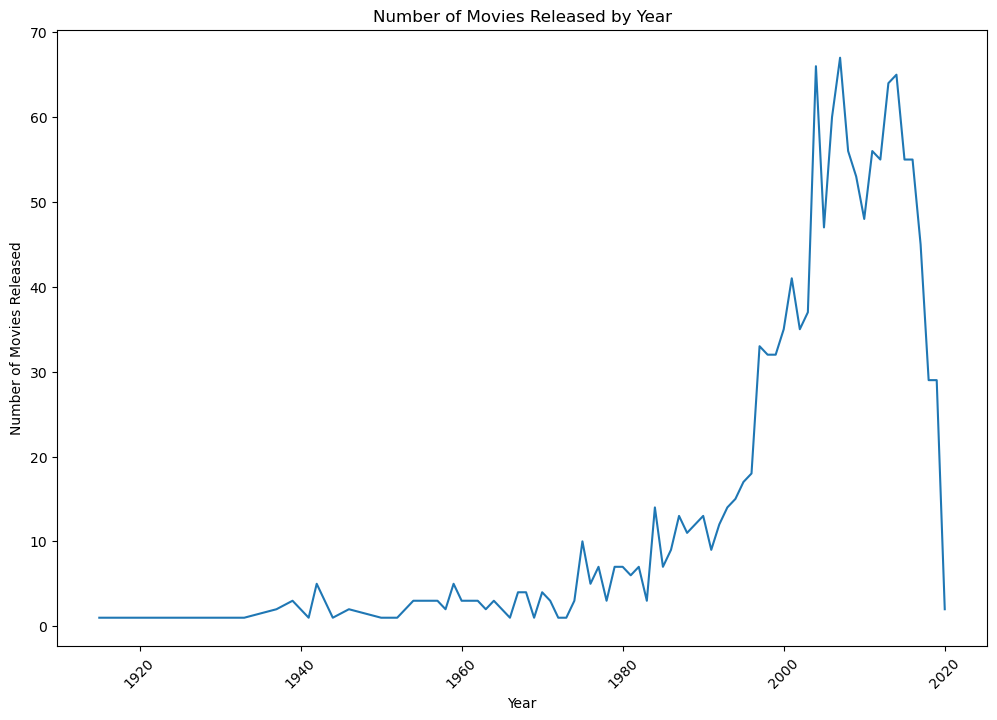

In [66]:
# Count the number of movies released per year
movies_per_year = combined_df.groupby('year').size().reset_index(name='movie_count')

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='movie_count', data=movies_per_year)
plt.title("Number of Movies Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.show()



### Top 10 Countries by Number of Movies Released

This analysis identifies the countries that have contributed the most to global cinema production. By examining the dataset, the ten leading countries in terms of the number of movies released were selected. 

A bar chart was created to visually represent the number of movies produced in these countries. This visualization provides insights into the dominance of certain countries in the movie production industry and highlights the distribution of movie-making across different regions of the world.

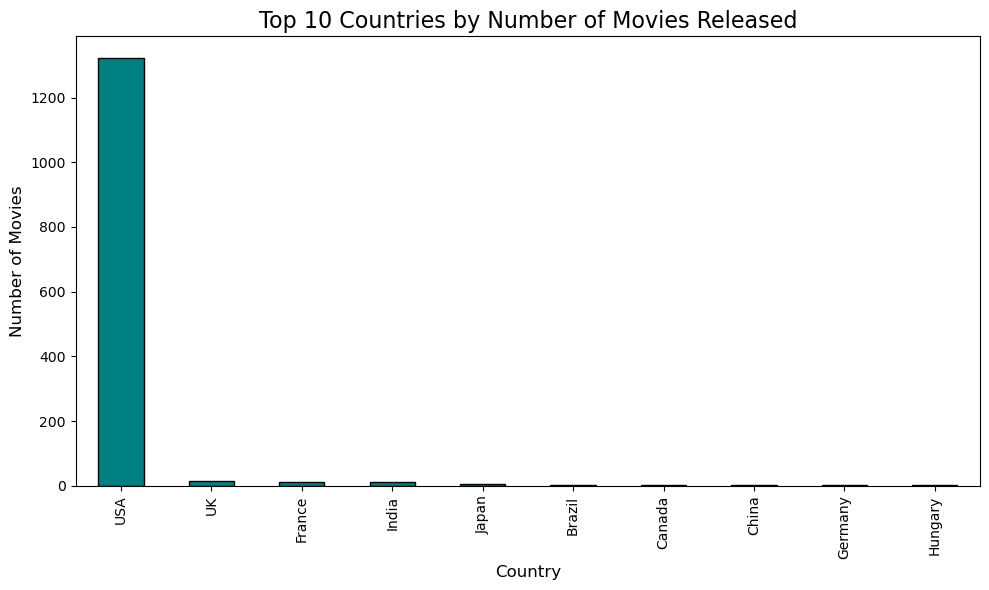

In [68]:
# Group by country
movies_per_country = combined_df.groupby('country')['name'].count().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
movies_per_country.head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 Countries by Number of Movies Released", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.tight_layout()
plt.show()

### Interactive Visualization of Genre Trends Over Time

This analysis provides an interactive visualization that allows users to compare the number of movies released by genre over a given period. The 'genres' column is expanded to associate each movie with its unique genres, and the dataset is then grouped by both years and genres to quantify the number of movies released in each genre over time.

An interactive dropdown widget is implemented at the top of the visualization, enabling users to filter the results by selected genres or view data for all genres at once. 

The scatter plot below displays the trend of movie releases over the years, with points labeled by genre. The hover functionality provides detailed information about each data point, including the year, genre, total number of movies released, and a list of the movies. This interactive approach offers an engaging and convenient way to explore genre-specific trends in the movie industry.



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
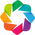

Column
    [0] Select(options=['All', 'Action', ...], value='All')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [130]:
hv.extension('bokeh')

# Ensure the dataset is named `combined_df`
required_columns = ['year', 'genres', 'name']
if not all(col in combined_df.columns for col in required_columns):
    raise ValueError(f"The dataset must contain the following columns: {required_columns}")

# Clean and process the genres column
combined_df['genres'] = combined_df['genres'].fillna('').str.strip()

# Expand the 'genres' column into multiple rows and associate movies with genres
movies_genres_expanded = combined_df.assign(
    genres=combined_df['genres'].str.split(';')  # Split genres into a list
).explode('genres')  # Expand each genre into a separate row

# Clean up genre names (strip whitespace) and drop any empty genres
movies_genres_expanded['genres'] = movies_genres_expanded['genres'].str.strip()
movies_genres_expanded = movies_genres_expanded[movies_genres_expanded['genres'] != '']

# Ensure there are no missing values in critical columns
movies_genres_expanded = movies_genres_expanded.dropna(subset=['year', 'name', 'genres'])

# Aggregate movie names and counts for hover
hover_data = (
    movies_genres_expanded.groupby(['year', 'genres'])
    .agg(
        movie_names=('name', lambda x: '<br>'.join(x)),  # Combine movie names for hover (stacked vertically)
        movie_count=('name', 'size')  # Count movies for the y-axis
    )
    .reset_index()
)

# Merge hover data back into the dataset for visualization
movies_genres_expanded = pd.merge(
    movies_genres_expanded,
    hover_data,
    on=['year', 'genres'],
    how='left'
)

# Drop duplicate rows for plotting so that each dot is unique per `year`-`genre` pair
plot_data = movies_genres_expanded.drop_duplicates(subset=['year', 'genres'])

# Create a dropdown widget to filter genres dynamically
genre_selector = pn.widgets.Select(
    name='Select Genre',
    options=['All'] + sorted(plot_data['genres'].unique()),  # Include 'All' for all genres
    value='All'
)

# Function to update the plot based on the selected genre
@pn.depends(genre_selector.param.value)
def update_plot(selected_genre):
    # Filter the data based on the selected genre
    filtered_data = (
        plot_data
        if selected_genre == 'All'
        else plot_data[plot_data['genres'] == selected_genre]
    )
    
    return filtered_data.hvplot.scatter(
        x='year',
        y='movie_count',  # Movie count on the y-axis
        color='genres',
        size=50,
        alpha=0.5,
        title="Movies Released by Genre Over Time",
        xlabel="Year",
        ylabel="Movie Count",
        hover_cols=['genres', 'movie_count', 'year', 'movie_names'],  # Genre, movie count, year, and names
        width=800,
        height=600,
        legend='top_right'
    ).opts(
        tools=['hover'],  # Ensure the hover tool is enabled
        hover_tooltips=[
            ("Year", "@year"),
            ("Genre", "@genres"),
            ("Movie Count", "@movie_count"),
            ("Movies", "@movie_names{safe}"),  # Ensure the movie names are interpreted as HTML
        ]
    )

# Display the layout inline in the notebook
layout = pn.Column(genre_selector, update_plot)
layout.servable()  


## Data export

In [133]:
# Save the cleaned and wrangled DataFrame to a new CSV file
combined_df.to_csv('combined_df.csv', index=False)
top_10_movies.to_csv('top_10_movies.csv', index=False)
top_10_horror_movies.to_csv('top_10_horror_movies.csv', index=False)
top10_raters.to_csv('top10_raters.csv', index=False)
top10_reviews.to_csv('top10_reviews.csv', index=False)
genre_avg_rating.to_csv('genre_avg_rating', index=False)

In [135]:
# Count the number of movies released per year
movies_per_year = combined_df.groupby('year').size().reset_index(name='movie_count')

# Plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='movie_count', data=movies_per_year)
plt.title("Number of Movies Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)

# Save the image before showing it
plt.savefig('movies_per_year.png', dpi=300, bbox_inches='tight')
plt.close()


In [136]:
# Group by country
movies_per_country = combined_df.groupby('country')['name'].count().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
movies_per_country.head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 Countries by Number of Movies Released", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.tight_layout()

# Save the image directly
plt.savefig('movies_per_country.png', dpi=300, bbox_inches='tight')

# Close the plot to ensure it doesn't display
plt.close()

## Conclusion

The major focus of this research is to analyze the trends in the film industry using ratings, genres, and popularity. Through data analysis and visualization, significant patterns were found, providing insights into the preferences of the audience. The approach's shortcomings, the main lessons learned, and possible enhancements for further research are outlined below.

### Limitations

- **Simplified Popularity Metric:** The popularity score measure used did not factor in additional features such as budgets, box office gross, and social media trends, which distorted the results.
- **Equal Weighting of Genres:** Movies with the same genres were treated equally, which may have affected the outcome.
- **Dataset Bias:** The most significant drawback of the dataset was that only popular movies were considered, excluding independent and small-scope films.

### Key Findings

- **Dominance of Specific Genres:** Out of the surveyed movies, Action, Drama, and Adventure had the highest ratings, emphasizing the audience's tendency to watch high-budget and meaningful programs.
- **Value of Robust Data Preparation:** The data was cleaned and organized to improve the quality of analysis.
- **Utility of Visualizations:** Graphical representations effectively conveyed the findings and made them easier to interpret.

### Future Improvements

- **Incorporating Additional Data Points:** Including data on movie budgets, box office earnings, and audience trends will provide a better structure for the analysis.
- **Expanding Dataset Scope:** Including data on independent films, international films, and lower-budget films will offer a broader view of global trends.
- **Predictive Modelling:** Machine learning techniques can be used to predict the success of movies based on factors such as cast, director, and genre.

By addressing these proposed changes, a more refined and insightful analysis can be achieved in future research.



## References

- Jaid Almotra (2025). *Exploring Movie Reviews Dataset*. [online] Kaggle. Available at: [https://www.kaggle.com/code/jaidalmotra/exploring-movie-reviews-dataset](https://www.kaggle.com/code/jaidalmotra/exploring-movie-reviews-dataset). [Accessed 12 Jan. 2025].
- Naseeba, B., Kumar Rao, N., Challa, N.P., and Chakravarthi, S. (2022). *Web Scraping (IMDB) Using Python*. [ResearchGate](https://www.researchgate.net/profile/Beebi-Naseeba/publication/368575445_WEB_SCRAPING_IMDB_USING_PYTHON/links/63ef43e919130a1a4a87a8c0/WEB-SCRAPING-IMDB-USING-PYTHON.pdf).
- Joshi, D., Sharma, P., & Jothikumar, C. (2022). *Predictive Modelling on IMDB’s Movie Data*. [Academia.edu](https://www.academia.edu/download/67582677/predictive_modelling_on_imdbs_movie_data_IJERTV10IS050179.pdf).
- Banerjee, O. (n.d.). *Data Analysis End-to-End IMDb dataset*. [Analytics Vidhya](https://medium.com/analytics-vidhya/data-analysis-end-to-end-imdb-dataset-2b6d9976ebc2).
- IMDb. (n.d.). *IMDb Top 100 Movies by User Rating*. [IMDb](https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc).
- IMDb. (n.d.). *IMDb Top 250 Movies*. [IMDb](https://www.imdb.com/chart/top/).







## Appendices

### Appendix A

C:\Users\likhi\AppData\Local\Temp\ipykernel_7000\3680906031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='movie_rated', data=combined_df, order=combined_df['movie_rated'].value_counts().index, palette='muted')


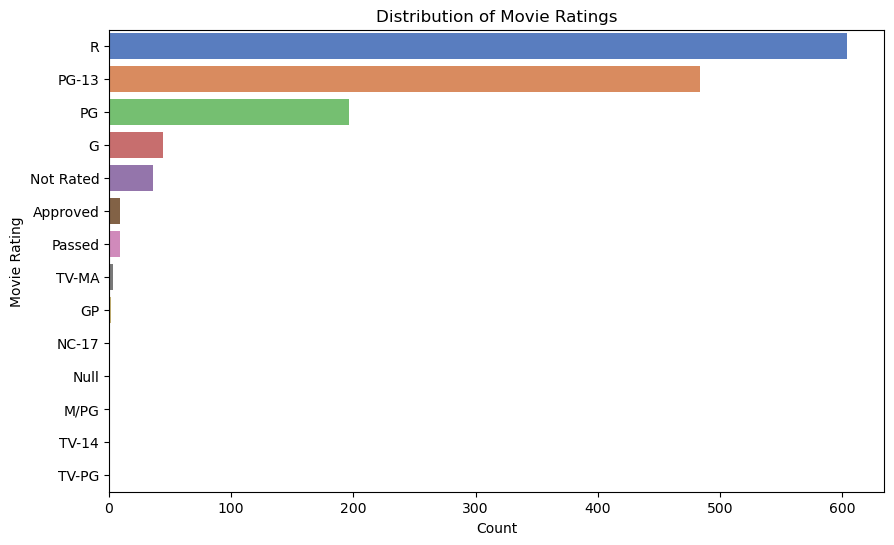

In [145]:
# Visualize distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.countplot(y='movie_rated', data=combined_df, order=combined_df['movie_rated'].value_counts().index, palette='muted')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Count')
plt.ylabel('Movie Rating')
plt.show()

### Appendix B

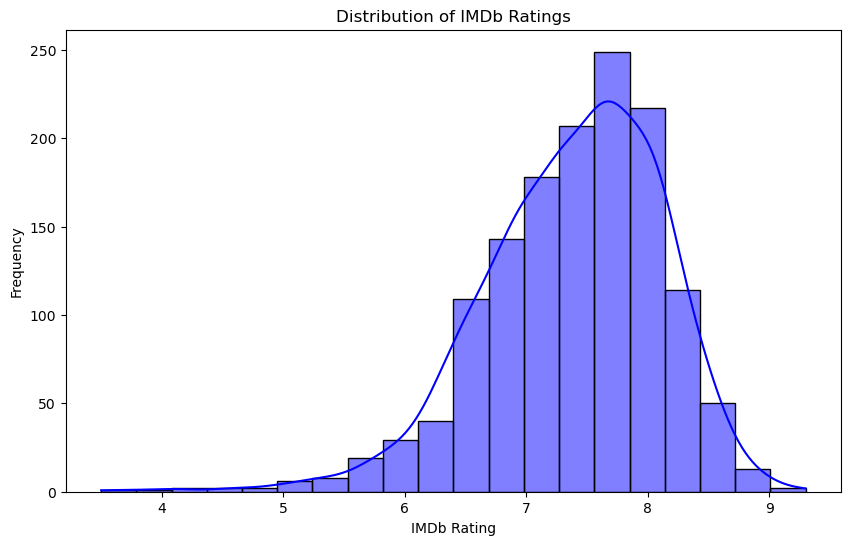

In [148]:
# Visualize distribution of IMDb ratings
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()